# ◆ 페르소나 분석
- 데이터 불러오기

In [9]:
import pandas as pd

In [11]:
df = pd.read_pickle('../data/aha/aha_data.pickle')

- 컬럼명 'review'로 바꿔주세요!

In [113]:
df.tail(5)

,title,review,date,tagged_review,2_grams,3_grams,vector
4985,알레르기성 결막염 점안액 질문드립니다,알레르기성 결막염으로 약국에서 오로메토론과 파타올을 처방받았습니다.1. 두 성분은 ...,23.10.28,"[알레르기, 결막염, 약국, 로메, 토론, 파타, 오다, 처방, 받다, 두, 성분,...","[알레르기 결막염, 결막염 약국, 약국 로메, 로메 토론, 토론 파타, 파타 오다,...","[알레르기 결막염 약국, 결막염 약국 로메, 약국 로메 토론, 로메 토론 파타, 토...","[-0.007174562, 0.009796116, 0.007250117, 0.000..."
4986,화장품을 여러회사제품으로 사용하면 피부에 영향이 있을까요?,선물 받은것 셈플받은것 쎄일할때 산것등 여러회사 제품의 기초화장품을 바르면 안 ...,23.10.28,"[선물, 받다, 셈, 받다, 쎄다, 사다, 회사, 제품, 기초, 화장품, 바르다, ...","[선물 받다, 받다 셈, 셈 받다, 받다 쎄다, 쎄다 사다, 사다 회사, 회사 제품...","[선물 받다 셈, 받다 셈 받다, 셈 받다 쎄다, 받다 쎄다 사다, 쎄다 사다 회사...","[-0.0065415264, 0.0007954431, 0.00934039, -0.0..."
4987,"약품중에 캡슐과 젤리로 쌓인약은 캡슐,젤리 재료가 뭔가요>?",약품중에 캡슐로 쌓인것도 있고 젤리같이 말랑말랑 말캉말캉한 재료로 쌓인것도 있는데 ...,23.10.27,"[쌓이다, 젤리, 말랑말랑, 말캉말캉하다, 재료, 쌓이다, 젤리, 재료]","[쌓이다 젤리, 젤리 말랑말랑, 말랑말랑 말캉말캉하다, 말캉말캉하다 재료, 재료 쌓...","[쌓이다 젤리 말랑말랑, 젤리 말랑말랑 말캉말캉하다, 말랑말랑 말캉말캉하다 재료, ...","[-0.0059907604, -0.0065465523, -0.007013881, 0..."
4988,영양제 먹는순서좀 알려주세요!,순서를 이렇게짰는데 이대로 먹으면 될까요?또 궁금한거는 저녁식후가 많은데 한번에 다...,23.10.27,"[순서, 이렇게, 짜다, 이대로, 먹다, 요, 궁금하다, 저녁, 후, 많다, 한번,...","[순서 이렇게, 이렇게 짜다, 짜다 이대로, 이대로 먹다, 먹다 요, 요 궁금하다,...","[순서 이렇게 짜다, 이렇게 짜다 이대로, 짜다 이대로 먹다, 이대로 먹다 요, 먹...","[-0.0033928077, -0.009174512, -0.0049748514, 0..."
4989,디크놀/트리돌 차이점 디크놀/타이놀 차이 궁금합니다,안녕하세요 선생님들1. 디크놀트리돌 차이점 디크놀은 쓰면 안되는 사람 궁금합니다 디...,23.10.27,"[선생님, 디, 크놀, 돌, 차이점, 디, 크놀, 쓰다, 안되다, 사람, 궁금하다,...","[선생님 디, 디 크놀, 크놀 돌, 돌 차이점, 차이점 디, 디 크놀, 크놀 쓰다,...","[선생님 디 크놀, 디 크놀 돌, 크놀 돌 차이점, 돌 차이점 디, 차이점 디 크놀...","[-0.002941997, -0.0026072562, 0.004505806, 0.0..."


In [14]:
display(df.shape, df.head(3))

(4990, 3)

,제목,본문,작성일자
0,글루타치온 성분이 무엇인가요???,"티비에 글루타치온 ,리포좀 글루차티온 이러는데 항산화작용? 이걸한다는데 어떻게 몸...",6시간 전
1,고가 비타민영양제 꼭 챙겨야할까요?,생각보다 한병 자체에 값이 밥값반값 정도의 가격이라...부담스러운데 많이들 챙겨먹는...,6시간 전
2,벤포벨b 복용 후 타이레놀 먹어도 될까요,저녁6시쯤 벤포벨b 먹었습니다 지금 치통이 와서 타이레놀 먹어도 상관 없을까요?...,15시간 전


In [16]:
# '제목', '본문', '작성일자' -> 'title', 'review', 'date'
df.columns = ['title','review','date']

# ◆ 클러스터링

## ◆ 1. 데이터 전처리하기
* 1.1. 특수문자 및 숫자 제거
* 1.2. 의미없는 짧은 글 제거

### 1.1. 특수문자 및 숫자 제거
    *정규표현식 사용

In [21]:
import re
from tqdm import tqdm

In [23]:
# pattern = r'[^a-zA-Z0-9가-힣\s\.\?\!]'

pattern = r'[^a-zA-Z0-9가-힣\s\.\?\!]'

new_review = []
for i in tqdm(df['review']):
    text = re.sub(pattern,'',i)
    new_review.append(text)

df['review'] = new_review

100%|██████████| 4990/4990 [00:00<00:00, 368245.07it/s]


### 1.2. 의미없는 짧은 글 제거

In [26]:
# len(review) 가 짧으면 i, 인덱스를 추출해서 drop으로 없애기!
for i, review in enumerate(tqdm(df.review)):
    if len(review) < 15 :
        df = df.drop([i])
        # 왜 i 를 [] 로?!

100%|██████████| 4990/4990 [00:00<00:00, 5256046.45it/s]


### 1.3. 핵심 키워드를 포함한 글만 추출
    *주석 처리 해주겠습니다! (핵심 키워드 정리 되면 하세요!)

In [29]:
# # 핵심 키워드 리스트에 넣어주세요!
# keyword_list = [
#     "조합", "배합", "혼합", "결합", "조제", "조립", "구성", "배열", "조직화", "조화", "융합", "통합", "병용", "병합", "조성",
#     # 과다복용
#     "과다복용", "과량투여", "과용", "과복용", "과다섭취", "과다사용", "중독", "오남용", "과잉섭취", "과도복용", "과다투약", "과다",
#     # 보관
#     "보관", "저장", "보존", "유지", "보호", "수납", "보관함", "저장고", "보관실", "냉장보관", "실온보관", "차광보관", "냉장", "실온",
#     # 시간
#     "시간", "기간", "간격", "주기", "시점", "시기", "때", "시각", "시계", "타이머", "알람", "일정", "스케줄", "언제",
#     # 식전
#     "식전", "공복 시", "식사 전", "공복상태", "식전 30분", "식전 1시간", "식사하기 전", "식사 직전",
#     # 식후
#     "식후", "식사 후", "식후 30분", "식후 1시간", "식사 직후", "식후 즉시", "식사 완료 후",
#     # 공복
#     "공복", "빈속", "공복상태", "금식", "단식", "공복 시", "음식물 섭취 전", "식사하지 않은 상태",
#     # 아침
#     "아침", "조식", "아침식사", "아침밥", "새벽", "오전", "아침시간", "모닝", "조조", "오전 중", "오전",
#     # 점심
#     "점심", "중식", "점심식사", "점심밥", "낮", "정오", "점심시간", "런치", "오후 초반", "오후",
#     # 저녁
#     "저녁", "석식", "저녁식사", "저녁밥", "밤", "야간", "저녁시간", "디너", "야식",
#     # 동시에
#     "동시에", "함께", "동시", "동반", "병행", "동시간대", "일시에", "한꺼번에", "동시적으로", "병렬적으로",
#     # 함께
#     "함께", "같이", "동반", "동행", "병용", "동시에", "더불어", "함께하여", "연계하여", "병행하여",
#     # 아이
#     "아이", "어린이", "유아", "소아", "청소년", "미성년자", "유소년", "영유아", "꼬마", "초등학생", "아기", "애기",
#     # 임산부
#     "임산부", "산모", "임신부", "임신 중인 여성", "태아", "출산 예정자", "임신 중", "임신기", "태교중인 여성",
#     # 남성
#     "남성", "남자", "신사", "사내", "남편", "아버지", "청년", "중년", "노년", "성인 남성", "미혼 남성",
#     # 여성
#     "여성", "여자", "숙녀", "아가씨", "부인", "어머니", "청년", "중년", "노년", "성인 여성", "미혼 여성"]

---

In [32]:
# # 핵심 키워드를 하나라도 포함하는 리뷰의 인덱스만 추출
# df = df.iloc[idx,:]
# df.reset_index(drop=True,inplace=True)

In [34]:
df.shape

(4990, 3)

- 추가 사항
  + ~기도 -> 불용어~
  + ~review REPLACE~
    + ' 지' -> '지' REPLACE
    + '가해서' -> '가 해서' REPLACE
  + ~tagged_review REPLACE~
    + 먹어야다 -> 먹다. replace
    + 챙기기 -> 챙기다. REPLACE
    + 요즘들어 -> 요즘. REPLACE

In [37]:
# review = review.replace('먹어야다','먹다')
# review = review.replace('챙기기','챙기다')
# review = review.replace('요즘들어','요즘')

In [42]:
for review in tqdm(df.review):
    review = review.replace(' 지','지')
    review = review.replace('가해서','가 해서')

100%|██████████| 4990/4990 [00:00<00:00, 1146323.64it/s]


## ◆ 2. 데이터 형태소 분리하기
* 2.0 사용자 사전 추가
* 2.1 불용어적용 및 형태소 분리
* 2.2 데이터 프레임에 추가

In [45]:
from konlpy.tag import Okt
okt = Okt()

### 2.0. 사용자 사전 추가
    *핵심 1팀 - 파일 - data - 사용자 사전 추가

In [47]:
# # 파일을 'a' 모드(append 모드)로 열어서 내용을 추가합니다
# with open(file_path, 'a') as file:
#     file.write("\n추가할 내용이 여기에 들어갑니다.")

# print("내용이 성공적으로 추가되었습니다.")

### 2.1. 불용어적용 및 형태소 분리
    *제공되는 한국어 불용어 파일 사용(ko-stopwords.csv) <- 핵심 1팀 - 파일 - data

In [51]:
import pandas as pd

In [53]:
stopwords_DF = pd.read_csv('../data/ko-stopwords.csv')
stopwords = list(stopwords_DF.stopwords)
len(stopwords)

599

    *추가 불용어 넣기

In [56]:
stopwords += ["기도", "영양제", "레시틴", "구리", "MSM", "커큐민", "이브A", "말레이트베르베린", "아르기닌", "테아닌", "코엔자임", "벤포벨S", "코큐텐", "비맥스메타", "판토텐산", "비오틴", 
"세노비스", "코랄칼슘", "흑염소", "씬지로이드", "루테인지아잔틴", "메가도스", "이소티논", "하이치올B", "유비퀴놀", "퀘르세틴", "쏜리서치", "포스파티딜콜린", 
"크레아틴", "로아큐탄니메겐", "인돌3카비놀", "베르베린", "글루코사민", "콘드로이친", "감마리놀렌산", "나이아신아마이드", "브로멜라인", "트리메부틴", "엘테아닌",
"달맞이종자유","퀘르세틴","L글루타민","베타글루칸","이노시톨","콘도로이친","이노시톨","포스파티딜세린","옥타코사놀","철분","판토텐산","마카","크레아틴",
"나우푸드","리퀴드씨엠","에르도스테인","메가도스","센트롬우먼","센트룸 우먼 더블업","센트룸 우먼3","얼라이브포우먼","베타글루칸","카테킨","디오맥스정","제타정",
"벤포벨에스정","아고틴정","야즈정","도베셀정","아로나민골드","피쉬콜라겐","피쉬오일","크랜베리글루타민","안국건강","포스파티딜콜린","모나콜린","콜린이노시톨",
"바나바잎", "니코버","니코챔스","리보트릴정","쿠에타핀서방정","트리티코정","자나팜정","테프라정","인데놀","L테아닌","맥시헤어플러스","닥터스헤어","제로우","자로우",
"리퀴드씨엠","레모나","인돌3카비놀","바이텍스콜라겐","바이독시정","바이오페린","바이오웰","오메틸오메가3","오메가루테인","오메가","아보다트","라라올라","매스틱검",
"감마리놀렌산","시스테인","곤약세라미드","세라펩타제","오쏘몰","멜리안","종근당오메가3","프로메가","나토키나제","아스타잔틴","타우린"]

In [58]:
len(stopwords)

713

In [60]:
import pickle
# 피클 파일에서 리스트 불러오기
with open('../data/불용어/integrated_supplement_list.pkl', 'rb') as f:     
    loaded_list = pickle.load(f)

In [62]:
stopwords += loaded_list

In [64]:
len(stopwords)

1233

In [66]:
stopwords += ['고릴라','비타민','안녕하다',"밀크", "씨", "슬", "글루", "타치", "온", "비타민", "알", "쏘다", "리서치", 
    "칼슘", "마그네슘", "고려", "은단", "루테", "인지", "잔틴", "라이프", "익스", "텐션",
    "비맥스", "제트", "파리", "포산", "아연", "오메가", "알티", "지", "스포츠", 
    "팔메", "토", "멀티", "미네랄", "나우", "푸드", "말레이", "트", "실리", "마린",
    "씨슬", "캘리포니아", "골드", "뉴", "트리", "션", "닥터", "에디", "투퍼", "데이",
    "시슬", "엽산", "씬", "지로", "이드", "옥", "타코", "사", "비", "맥스", "더블", "엑스", "종합", "뉴트리라이트", "데비", "베타", "녹차", "양파", "껍질", "강황", 
    "이노시톨", "렉스", "쎄레브", "베타카로틴", "킬레이트", "코큐텐", "라이신", "프로폴리스", "글루타민", "알헬시오리진스", "피크", "팩비피젠", "비", "피더", "알레", 
    "이크", "파티", "딜", "세린", "포스", "마리", "놀랜", "산", "감", "마리", "놀랜", "옥", "타코", "시", "블랙", "모", "어스", "메타", 
    "그린", "슬림업", "애플", "사이다", "부루", "펜정", "시럽", "블루", "칸", "비오틴", "유산균", "스테", "아", "린산", "연", 
    "양제원", "캐다", "포니", "아", "커큐민", "레스베라트롤", "레이브", "스병티", "베이직", "메티마졸", "종근당", "소프트", "젤", "정", 
    "베다", "캡슐", "정", "안", "토시", "아", "딘", "프로", "이노시톨", "프로바이오틱스", "큐텐", "알로", "리틀", "스", "맥스", "부스터", "코큐텐", "부스터", "징코", 
    "피크", "마", "그", "듀오", "대범하다", "애벌", "래", "시", "딜", "보", "프림", "에", "글루타민", "트루", "파워", "메", "가", "야", "즈", 
    "베타", "글루칸", "스테롤", "테로", "스틸", "베다", "홍삼", "코큐텐", "비오틴", "유산균", "프로폴리스", "센트륨", "솔",
    "케르", "세", "틴", "브로", "멜라", "인", "영", "양제", "도스", "궁금", "질문", "소티", "논", "노", "제", "놀", "콘드", "로", "이친", 
    "안녕", "하다", "마늘", "글루코사민", "콘드", 
    "로", "철분", "액", "상", "소티", "논", "놀", "보스", "웰", "리아", "달맞이꽃", "종", "자유", "꽃", "추출", "물", "밀크", "씨", "슬", 
    "글루", "타치", "온", "비타민", "알", "쏘다", "리서치", 
    "칼슘", "마그네슘", "고려", "은단", "루테", "인지", "잔틴", "라이프", "익스", "텐션",
    "비맥스", "제트", "파리", "포산", "아연", "오메가", "알티", "지", "스포츠", 
    "팔메", "토", "멀티", "미네랄", "나우", "푸드", "말레이", "트", "실리", "마린",
    "씨슬", "캘리포니아", "골드", "뉴", "트리", "션", "닥터", "에디", "투퍼", "데이",
    "시슬", "엽산", "씬", "지로", "이드", "케르", "세", "틴", "브로", "멜라", "인",
    "소티", "논", "궁금", "질문", "옥", "타코", "사", "비", "맥스", "더블", "엑스",
    "종합", "뉴트리라이트", "데비", "베타", "녹차", "양파", "껍질", "강황", "이노시톨",
    "렉스", "쎄레브", "베타카로틴", "킬레이트", "코큐텐", "라이신", "프로폴리스", "글루타민",
    "알헬시오리진스", "피크", "팩비피젠", "피더", "알레", "이크", "파티", "딜", "세린",
    "포스", "마리", "놀랜", "산", "감", "블랙", "모", "어스", "메타", "그린",
    "슬림업", "애플", "사이다", "부루", "펜정", "시럽", "블루", "칸", "비오틴", "유산균",
    "스테", "아", "린산", "연", "양제원", "캐다", "포니", "커큐민", "레스베라트롤", "레이브",
    "스병티", "베이직", "메티마졸", "종근당", "소프트", "젤", "베다", "캡슐", "안", "토시",
    "아딘", "프로", "큐텐", "알로", "리틀", "스", "부스터", "징코", "듀오", "대범하다",
    "애벌", "래", "보", "프림", "에", "트루", "파워", "메가", "야즈", "글루칸",
    "스테롤", "테로", "스틸", "홍삼", "센트륨", "솔", "노", "제", "콘드", "로",
    "이친", "안녕", "하다", "마늘", "철분", "액상", "보스", "웰", "리아", "달맞이꽃",
    "종자유", "꽃", "추출물"] # 아래와 같이 넣기!!

In [68]:
stopwords = list(set(stopwords))

In [70]:
len(stopwords)

1348

In [72]:
def okt_pos_tagging(string):
    pos_words = okt.pos(string, stem=True, norm=True)
    # stem : 어근화 | norm : 정규화
    
    tagged_list = []
    for word, tag in pos_words:
        # 형태소 분리
        if tag in ['Noun','Adjective','Verb','Adverb']:
            # 불용어 제거
            if word not in stopwords:
                tagged_list.append(word)
    # words = [word for word, tag in pos_words if tag in ['Noun','Adjective','Verb'] 
    #          if word not in stopwords]
    
    return tagged_list

### 2.2 데이터 프레임에 추가

    *아래 for문 생각보다 오래 걸렸어요! (수민님!)

In [76]:
"고릴라" in stopwords

True

In [78]:
stopwords;

In [80]:
tagged_list = []
for review in tqdm(df.review):
    tagged = okt_pos_tagging(review)
    tagged_list.append(tagged)

100%|██████████| 4990/4990 [01:01<00:00, 80.65it/s] 


In [81]:
df['tagged_review'] = tagged_list

---

In [83]:
from nltk import ngrams

In [84]:
def make_n_grams(x,n):
    x = ' '.join(x)
    x = x.replace('먹어야다','먹다')
    x = x.replace('챙기기','챙기다')
    x = x.replace('요즘들어','요즘')
    n_grams = ngrams(x.split(), n)
    n_grams = [' '.join(grams) for grams in n_grams]
    
    return n_grams

In [85]:
# test = df.copy(deep=True)

In [86]:
df['2_grams'] = df.tagged_review.apply(lambda x : make_n_grams(x,2))

In [87]:
df['3_grams'] = df.tagged_review.apply(lambda x : make_n_grams(x,3))

In [88]:
# df

---

## ◆ 3. 벡터화
* 3.1 doc2vec 준비(문서의 순서 매기기)
* 3.2 doc2vec 학습시키기
* 3.3 벡터 값 데이터 프레임에 추가

In [91]:
#import gensim 안될때 첫번째시도
# pip install --upgrade scipy
# pip install --upgrade gensim

#두번쨰시도
#pip install --upgrade numpy

In [92]:
# !pip show scipy

In [93]:
# [a, b, c, d] => (a,b,c) (b,c) (c,d)

In [94]:
import gensim #자연어 처리 및 토픽 모델링을 위한 라이브러리
from gensim.models.doc2vec import TaggedDocument
from gensim.models import doc2vec

### 3.1 doc2vec 준비
    - word2vec은 단어 하나를 하나의 vector화
    - doc2vec은 문서 하나를 하나의 vector화

In [96]:
df['2_grams'];

In [97]:
# doc2vector
tagged_corpus_list = []  # 벡터 값이 들어갈 리스트
for i, token in enumerate(tqdm(df['tagged_review'])):
    tag = 'document {}'.format(i)
    tagged_corpus_list.append(TaggedDocument(tags=[tag], words=token)) 

100%|██████████| 4990/4990 [00:00<00:00, 323326.59it/s]


In [98]:
# doc2vector
tagged_corpus_list = []  # 벡터 값이 들어갈 리스트
for i, token in enumerate(tqdm(df['3_grams'])):
    tag = 'document {}'.format(i)
    tagged_corpus_list.append(TaggedDocument(tags=[tag], words=token)) 

100%|██████████| 4990/4990 [00:00<00:00, 506254.58it/s]


In [257]:
tagged_corpus_list[0]

TaggedDocument(words=['티비 리포좀 글루차티온', '리포좀 글루차티온 이르다', '글루차티온 이르다 항산화작용', '이르다 항산화작용 걸', '항산화작용 걸 몸', '걸 몸 흡수', '몸 흡수 음식', '흡수 음식 흡수', '음식 흡수 하나요', '흡수 하나요 아니다', '하나요 아니다 식품', '아니다 식품 먹다'], tags=['document 0'])

In [99]:
df.review[3]

'안녕하세요 순한고릴라182입니다. 저희 어머니가 요즘 간병을 하시면서 밤에 잠을 잘 못주무시는데요 어머니 표정에 피곤에절어잇더라고요 너무 마음 아픈데 뭐라도 해드리고 싶은데 어떤 걸 해드려야 좋을지 추천 부탁드립니다. 정관장 홍삼 스틱 이런거 드리는게 의미가잇는지 잘 모르겟어요 몸에 도움 될 만한 제품 추천해주세요  엄마볼떄마다 마음아파요...'

### 3.2 doc2vec 학습시키기
    <model 하이퍼파라미터 값>
    # vector_size : 생성할 문서 벡터의 크기
    # alpha: 모델 학습시 초기 학습률 0.025는 일반적으로 사용됨
    # min_alpha: 학습 과정에서 alpha 값을 이 값으로 줄여나가게 됩니다
    # window : 문맥 윈도우 크기, 주변 몇개의 단어의 문맥을 고려하여 학습하는가

In [100]:
model = doc2vec.Doc2Vec(vector_size=100, min_alpha=0.025, window=5, seed = 216)

In [101]:
# Vocabulary 빌드
model.build_vocab(tagged_corpus_list)

model.train(tagged_corpus_list, total_examples=model.corpus_count, epochs=5)
# moedel.corpus_count : 각 형태소 카운팅.
# epochs : for문이라 생각 몇 번 학습 할꺼냐?
# 너무 많이 학습하면, 주어진 데이터에 과적합 할 수 있음.
# 한 번 학습할 때, 텍스트가 흩뿌려지고 가까이 있는 데이터 값을 가지고 의미/학습을 함. 

### 3.3 벡터 값 데이터 프레임에 추가

In [425]:
# 학습을 시킨 모델에서 벡터 값 가져오기
# 키 값이 아까 달아둔 tag 값 (document {i})

In [305]:
len(model.dv)

4990

In [102]:
vector_list = []

for i in tqdm(range(len(df))):
    # 원하는 벡터 값
    doc2vec = model.dv['document {}'.format(i)]
    vector_list.append(doc2vec)

100%|██████████| 4990/4990 [00:00<00:00, 742499.54it/s]


In [103]:
df['vector'] = vector_list

## ◆ 4. 병합 계층적 클러스터링
* 4.1 ward 기준으로 덴드로그램 그려보기
* 4.2 실루엣 지수 확인해서 토픽 갯수 정하기
* 4.3 가장 적절한 클러스터링 갯수 df에 삽입

In [105]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

### 4.1 ward 기준으로 덴드로그램 그려보기

In [107]:
linked = linkage(list(df['vector']), 'ward')

    *이미지 저장하고 싶으시면 아래 savefig 주석 푸세요!

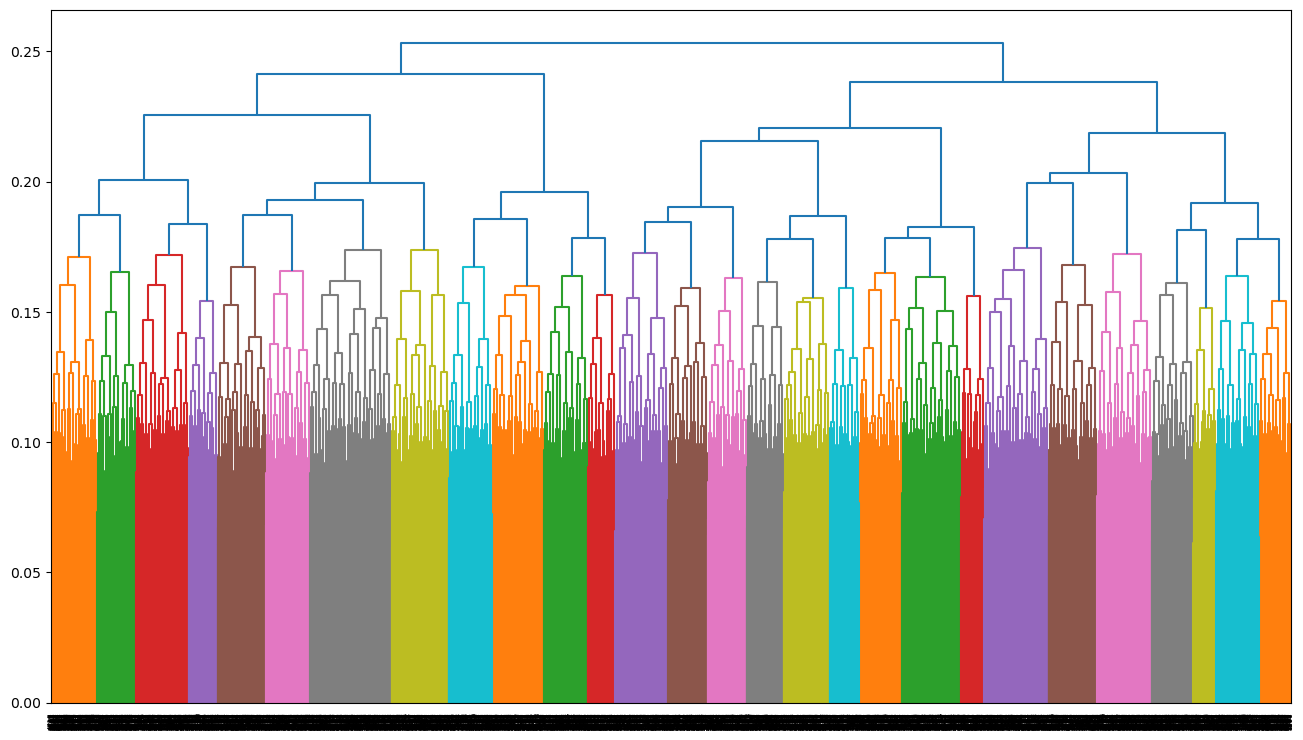

In [112]:
plt.figure(figsize=(16,9))
dendrogram(linked,
           orientation = 'top',          #방향 위쪽으로그려짐
           distance_sort = 'descending', #내림차순 정렬
           show_leaf_counts=True )
plt.savefig('컬쳐_덴그로그램.png')
plt.show()

### 4.2 실루엣 지수 확인해서 토픽 갯수 정하기

In [116]:
from sklearn.metrics.cluster import silhouette_score
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans

클러스터 하나를 Actor로 보기로 했는데 클러스터가 너무 커버리면 해석하기가 어려움.

In [392]:
# import warnings
# warnings.filterwarnings('ignore')
# # import os
# # os.environ["OMP_NUM_THREADS"] = '10' # 사용할 thread 만큼 부여

In [454]:
# 몇 개를 기준으로 클러스터를 할 지
n_cluster = []
# 실루엣 score
s_score = []

for i in tqdm(range(2, 10, 1)):
    cluster = AgglomerativeClustering(n_clusters=i, linkage='ward')
    cluster_label = cluster.fit_predict(list(df['vector']))
    score = silhouette_score(list(df['vector']), cluster_label)

    n_cluster.append(i)
    s_score.append(score)

100%|██████████| 8/8 [00:09<00:00,  1.24s/it]


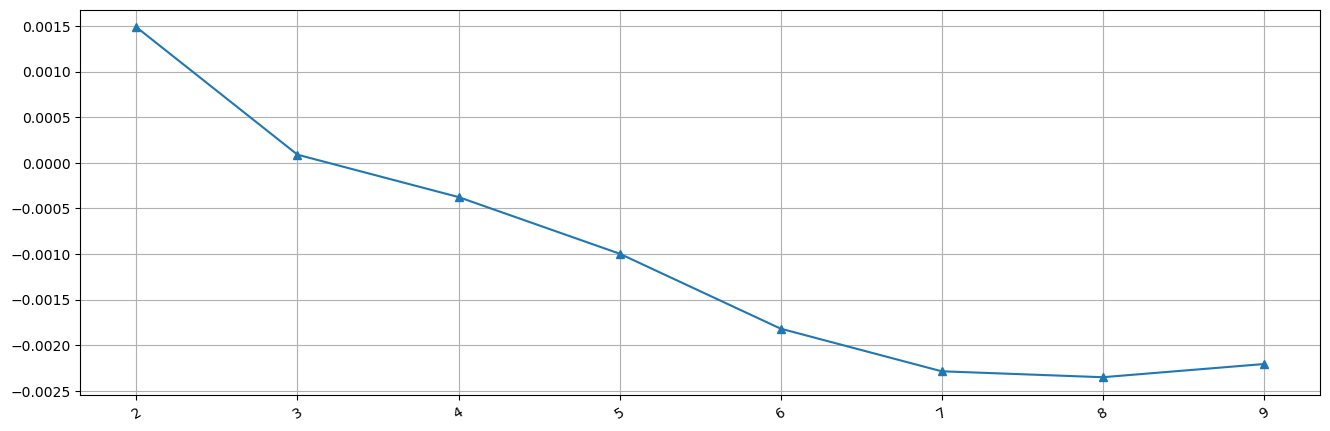

In [455]:
plt.figure(figsize=(16,5))
plt.plot(n_cluster, s_score, marker='^')
plt.grid()
plt.xticks(n_cluster,rotation=30)
plt.show()

(클러스터 갯수 설정하기!)

    *엘보우 기법에 의해 확 꺽이는 부분을
    *3과 4의 실루엣 지수가 비슷하면, 하나 적은 클래스터
    *클러스터 많아 질수록 실루엣 같은데, 다른 document를 배치 했을 때 클러스터 수가 적을 수록 적절한 클러스터로 갈 확률이 높기에

### 4.3 가장 적절한 클러스터링 갯수 df에 삽입

In [118]:
n_clusters = 3

In [476]:
# df = df.drop(['split_4_cluster','split_7_cluster','split_3_cluster'],axis=1)

In [480]:
df.head();

In [123]:
# result = pd.DataFrame({'n_cluster' : n_cluster, 'score' : s_score})

cluster = AgglomerativeClustering(n_clusters = n_clusters, linkage='ward')
cluster_label = cluster.fit_predict(list(df['vector']))

df['cluster'] = cluster_label

In [125]:
df.cluster.value_counts()

cluster
0    2718
1    1601
2     671
Name: count, dtype: int64

### 4.4 클러스터 별 파일 내보내기

In [486]:
# df.cluster.unique()

    *내보낼 파일 명

In [127]:
df_name = 'aha_clutser'

    *파일 내보내기

In [490]:
for i in df.cluster.unique():
    df_pickle = df[df['cluster'] == i]
    df_pickle.to_pickle('../data/aha/cluster/{}{}.pkl'.format(df_name,i))

    #지금까지 Actor를 나누는 코드, 실습을 해왔음
    #각 Actor들이 그럼 어떤 desire, needs, pain point가 있는지 봐보자!

In [492]:
df.to_pickle('../data/aha/cluster/aha_cluster.pkl')

In [272]:
# # PICKLE 파일로 저장하기
# import pickle

# with open('컬쳐 클러스터링(3) 결과.pkl', 'wb') as file:
#     pickle.dump(df, file)

    *꼭 해야 하는 부분은 아닙니다!
---

## ◆ 5. 해석하기:TF-IDF
* 문서 내에서 어떤 단어가 얼마나 중요한지를 평가하는 데 사용되는 방법
* 5.1 TF-IDF 계산
* 5.2 데이터프레임으로 만들고 정렬하기

### 5.1 TF-idf 계산
* 각 클러스터 마다 tfidf가 높은 워드들 찾기
* 각 클러스터들을 하나의 문서로 가정하여 tf-idf 값 추출

In [130]:
from collections import Counter
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer

    #각각의 클러스터의 주제를 찾는 것이기 떄문에,  
    #tf-idf 점수는 클러스터 별로 주제 단어를 배정해야 하니까 
    #6개의 클러스터 = 6개의 문서 => 문서 당 주제어를 뽑는다.

In [498]:
# df.head(3)

In [499]:
# df.iloc[2833].review

In [500]:
# df.iloc[2833].tagged_review;

In [131]:
all_document = []
for i in df['cluster'].unique() : 
    
    pos_tagged = df[df['cluster']==i]["tagged_review"]
    cluster_document = ''
    for pos in pos_tagged:
        doc = ' '.join(pos)
        cluster_document += doc + ' '

    all_document.append(cluster_document)

In [134]:
# 클러수터의 수와 동일해야 한다!
len(all_document)

3

In [136]:
all_document[0][:60]

'티비 리포좀 글루차티온 이르다 항산화작용 걸 몸 흡수 음식 흡수 하나요 아니다 식품 먹어야다 저녁 먹다 지금'

In [168]:
# pos_tagged

In [137]:
# 모델 선언
vectorizer = TfidfVectorizer(ngram_range=(3,3))
tfidf_matrix = vectorizer.fit_transform(all_document)

In [138]:
feature = vectorizer.get_feature_names_out()
dense = tfidf_matrix.todense()

tf_idf_df = pd.DataFrame(dense, columns=feature)

In [139]:
tf_idf_df_transposed = tf_idf_df.T
# tf_idf_df_transposed

    #각각의 클러스터 별로 높은 tf-idf 값을 가진 단어들을 보도록 정렬해서 저장하기

In [507]:
len(tf_idf_df_transposed)

82908

In [508]:
#8238 사전 단어 개수
#39128 n-gram 사전 단어 개수가 줄어야 하는데 

In [510]:
# for i in range(len(df.split_4_cluster.unique())):
#     display(tf_idf_df_transposed[i].sort_values(ascending=False)[:50])

### 5.2 데이터프레임으로 만들고 정렬하기

In [144]:
for i in tqdm(tf_idf_df_transposed.columns):
    tf_idf_data = tf_idf_df_transposed[i].sort_values(ascending = False)
    data = {'word' : tf_idf_data.index, 'tf_idf' : tf_idf_data.values}
    data_df = pd.DataFrame(data)
    data_df.to_pickle('../data/aha/cluster/aha_cluster{}_tf-idf.pkl'.format(i))
    # data_df.to_csv('../data/aha/cluster/aha_cluster{}_tf-idf.csv'.format(i), encoding='utf-8-sig')

100%|██████████| 3/3 [00:00<00:00, 56.22it/s]


    *데이터 불러오기
    *globals() 활용 
[설명 링크](https://trustyou.tistory.com/197)

In [514]:
# for i in df.cluster.unique():
#     globals()["df_cluster{}_tf_idf".format(i)] = pd.read_csv('../data/aha/cluster/aha_cluster{}_tf-idf.csv'.format(i), index_col=0)

    *아래 코드를 위의 for문으로 만든겁니다 그냥 참고만 하시고 변수로 직접 불러와도 됩니다!

In [332]:
# df_cluster0_tf_idf0 = pd.read_csv('../data/cluster/aha_cluster0_tf-idf.csv',index_col=0)
# df_cluster1_tf_idf = pd.read_csv('../data/cluster/aha_cluster1_tf-idf.csv',index_col=0)
# df_cluster2_tf_idf = pd.read_csv('../data/cluster/aha_cluster2_tf-idf.csv',index_col=0)

    *추후 각 클러스터,Actor별 tf-idf확인 해보기! - Actor를 해석하기 위해서

In [345]:
df_cluster2_tf_idf.head(3)

,word,tf_idf
0,먹다,0.594788
1,양제,0.351264
2,복용,0.282635


In [334]:
# 클러스터 이름이 달린 파일 내보내기
df.to_pickle('../data/aha/cluster/aha_cluster.pkl')

---
# ◆ 클러스터(Actor) 별 Action 분석 - 선택

In [518]:
import pandas as pd
import numpy as np
import pickle
from tqdm import tqdm
import warnings
import re
from matplotlib import pyplot as plt
# warnings.filterwarnings('ignore')

    *데이터 불러오기

In [350]:
with open('../data/aha/cluster/aha_cluster.pkl', 'rb') as file:
    df = pickle.load(file)

In [520]:
df.head(3)

,title,review,date,tagged_review,2_grams,3_grams,vector,cluster
0,글루타치온 성분이 무엇인가요???,티비에 글루타치온 리포좀 글루차티온 이러는데 항산화작용? 이걸한다는데 어떻게 몸에...,6시간 전,"[티비, 리포좀, 글루차티온, 이르다, 항산화작용, 걸, 몸, 흡수, 음식, 흡수,...","[티비 리포좀, 리포좀 글루차티온, 글루차티온 이르다, 이르다 항산화작용, 항산화작...","[티비 리포좀 글루차티온, 리포좀 글루차티온 이르다, 글루차티온 이르다 항산화작용,...","[0.0033817005, -0.009730394, -0.0026815915, 0....",0
1,고가 비타민영양제 꼭 챙겨야할까요?,생각보다 한병 자체에 값이 밥값반값 정도의 가격이라...부담스러운데 많이들 챙겨먹는...,6시간 전,"[생각, 병, 자체, 값, 밥값, 반값, 정도, 가격, 부담스럽다, 많이, 들다, ...","[생각 병, 병 자체, 자체 값, 값 밥값, 밥값 반값, 반값 정도, 정도 가격, ...","[생각 병 자체, 병 자체 값, 자체 값 밥값, 값 밥값 반값, 밥값 반값 정도, ...","[-0.007854082, 0.0019090378, 0.006076473, -0.0...",0
2,벤포벨b 복용 후 타이레놀 먹어도 될까요,저녁6시쯤 벤포벨b 먹었습니다 지금 치통이 와서 타이레놀 먹어도 상관 없을까요?...,15시간 전,"[저녁, 먹다, 지금, 치통, 오다, 타이레놀, 먹다, 상관, 없다, 답변, 부탁드...","[저녁 먹다, 먹다 지금, 지금 치통, 치통 오다, 오다 타이레놀, 타이레놀 먹다,...","[저녁 먹다 지금, 먹다 지금 치통, 지금 치통 오다, 치통 오다 타이레놀, 오다 ...","[-0.0070466558, 0.002885451, 0.00030774498, 0....",0


## ◆ 1. LDA를 위한 데이터 전처리
* 1.1. 전체 단어의 사전 만들고 각 문서에 매칭하기
    > 단어들이 문서에 얼마나 위치해 있는지 분포를 파악해야하기 때문에 분석할 전체 데이터 대상으로
    사용된 단어의 사전을 생성해야한다,

In [522]:
import gensim
from gensim import corpora, models
from gensim.corpora import Dictionary

In [524]:
from gensim.models import CoherenceModel
import matplotlib.pyplot as plt
import numpy as np

### 1.1 전체 단어의 사전 만들고 각 문서에 매칭하기

In [526]:
def preprocess_lda(df_cluster,tagged_review):
    all_documents = list(df_cluster[tagged_review])
    dictionary = Dictionary(all_documents)
    
    corpus = []
    for doc in all_documents:
        corpus.append(dictionary.doc2bow(doc))
    
    return corpus, all_documents, dictionary

In [534]:
corpus, all_documents, dictionary = preprocess_lda(df_cluster,"3_grams")

In [542]:
all_documents[0]

['말다 미지근하다 말다',
 '미지근하다 말다 음료',
 '말다 음료 커피',
 '음료 커피 먹다',
 '커피 먹다 안되다',
 '먹다 안되다 이유',
 '안되다 이유 궁금하다']

In [544]:
# for i in tqdm(range(len(df.cluster.unique()))):
#     df_cluster = df[df.cluster == i]
#     actor_action_n = action_n_list[i]
    
#     corpus, all_documents, dictionary = preprocess_lda(df_cluster,"tagged_review")
    
#     topic_num = actor_action_n
#     ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = topic_num, id2word = dictionary,
#                                                random_state = 216, passes = 5)
#     # 토픽을 선정 했으니, 계속 같은 결과 나오게 RandomSeed 고정 시키기

# # --- 토픽별 확률을 확인 해 max(확률 값)의 인덱스 = 토픽 라벨링

#     action_align = []
#     # 라벨을 담을 리스트
    
#     for doc in tqdm(ldamodel.get_document_topics(corpus)):
#     # 0번 리뷰에 대한 [(토픽 넘버, 확률 값)(토픽 넘버, 확률 값),(토픽 넘버, 확률 값)]
#     # 1번 리뷰에 대한 [(토픽 넘버, 확률 값)(토픽 넘버, 확률 값),(토픽 넘버, 확률 값)]
        
#         label = []
#     # 토픽 넘어 담을 리스트
#         value = []
#     # 확률 값을 담을 리스트
        
#         for score in doc:
#             label.append(score[0])
#             value.append(score[1])
    
#         max_index = np.argmax(value)
#         action_n = label[max_index]
#         action_align.append(action_n)

#     df_cluster['action_cluster'] = action_align
    
#     df_cluster_action_list.append(df_cluster)
#     ldavis_list.append([ldamodel, corpus, dictionary])

---

## ◆ 2. LDA모델 만들기
* 2.1 LDA 기본 모델 만들기
* 2.2 LDA 토픽개수 선정
* 2.3 선정한 토픽 개수로 Action 넘버 매칭

### 2.1 LDA 기본 모델 만들기
* skip

### 2.2.1 LDA 토픽개수 선정
* cohearence & perplexcity

In [546]:
def plot_for_topic(df_cluster,tagged_review,n):
    corpus, all_documents, dictionary =  preprocess_lda(df_cluster,tagged_review)
    
    perplex_values = []
    
    for i in range(2,10):
        ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=i, id2word=dictionary)
        perp_v = ldamodel.log_perplexity(corpus)
        perplex_values.append(perp_v)

    coherence_values = []

    for i in range(2,10):
        ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=i, id2word=dictionary)
        coherence_model = CoherenceModel(model = ldamodel, texts = all_documents, dictionary = dictionary, topn = i)
        coherence_score = coherence_model.get_coherence()
        coherence_values.append(coherence_score)

    fig, axes = plt.subplots(2,1, figsize =(16,8))

    # > 2.2.1 Perplexity 그래프 만들기
    x = range(2,10)
    axes[0].plot(x, perplex_values, marker='o')
    axes[0].set_xlabel("Actor{}_Number of topics".format(n))
    axes[0].set_ylabel('Perplexity score')

    # > 2.2.1 Cohearence 그래프 만들기
    x = range(2,10)
    axes[1].plot(x, coherence_values, marker='o')
    axes[1].set_xlabel('Actor{}_Number of topics'.format(n))
    axes[1].set_ylabel('Coherence score')

    # 저장하고 싶다면!!
    # plt.savefig('../data/number_of_topics.png')
    
    return plt.show()

In [548]:
df.cluster.value_counts()

cluster
0    2801
1    1687
2     502
Name: count, dtype: int64

    *클러스터 n번을 대상으로 cohearence & perplexcity 확인하기

  0%|          | 0/3 [00:00<?, ?it/s]

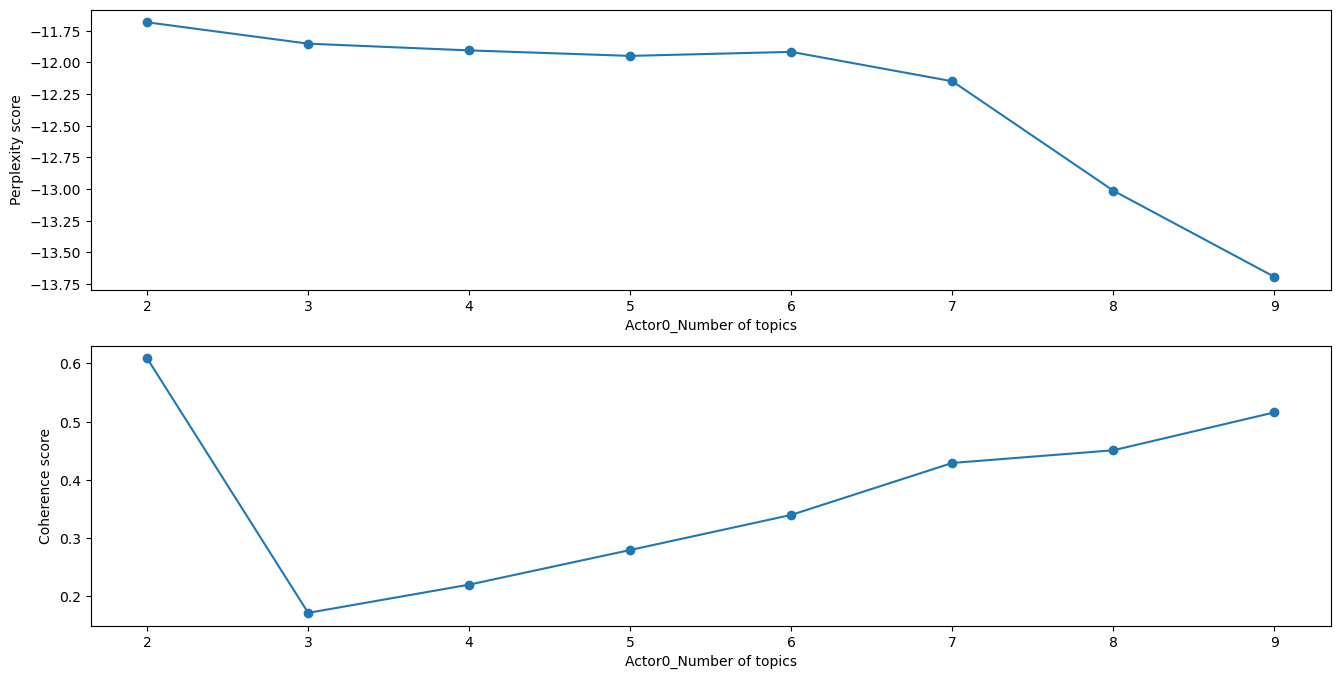

 33%|███▎      | 1/3 [01:42<03:24, 102.50s/it]

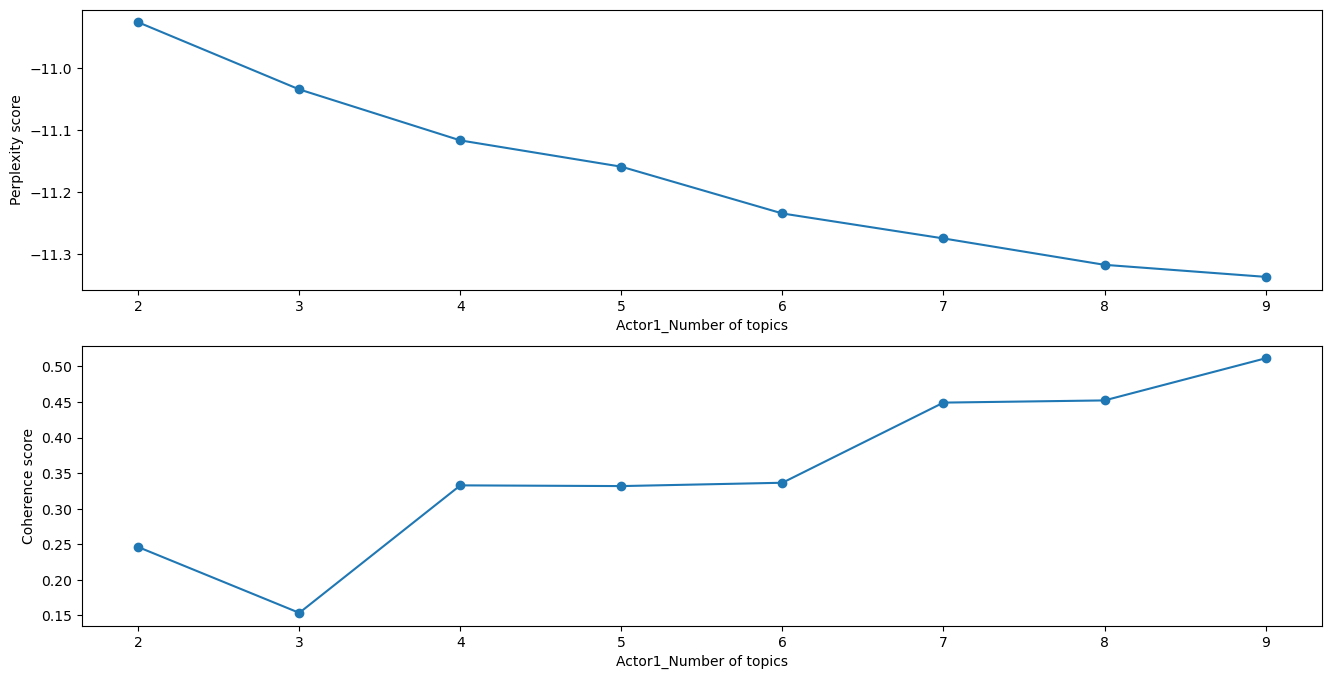

 67%|██████▋   | 2/3 [03:13<01:35, 95.96s/it] 

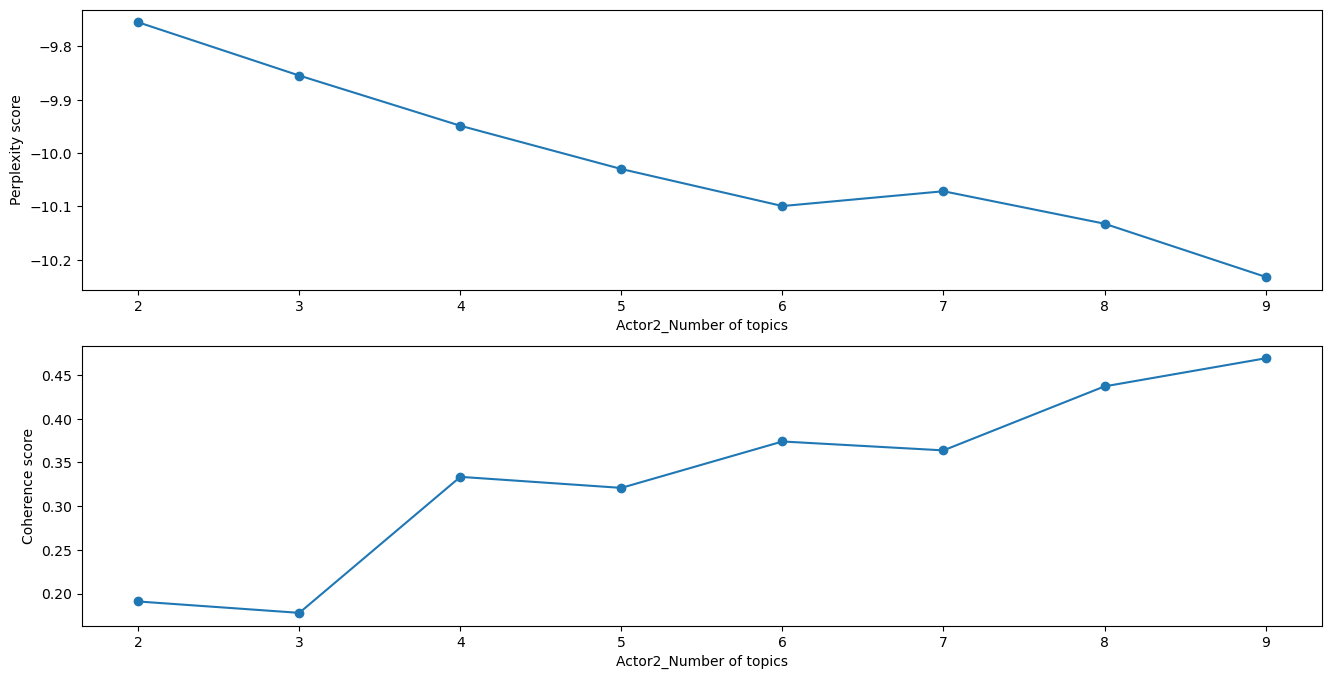

100%|██████████| 3/3 [04:27<00:00, 89.00s/it]


In [550]:
for n in tqdm(range(len(df.cluster.unique()))):
    df_cluster = df[df['cluster'] == n]
    plot_for_topic(df_cluster,"3_grams",n)

### 2.2.2 LDA 토픽개수 선정
    *위 그래프를 보고 각 Actor별 Action 수 정하기!
    *클러스터 = Actor 수 만큼 action_n 변수 생성해야 합니다! 아래는 예제 입니다!
    *그래프 제목에 나오는 Actor 번호 순서와 아래 for문의 Actor 번호 순서 동일합니다! - 그래도 유의하세요!

In [552]:
action_n_list = []
for i in range(len(df.cluster.unique())):
    globals()["actor{}_action_n".format(i)] = int(input("Actor{}의 정한 액션 Number를 입력하세요 : ".format(i)))
    action_n_list.append(globals()["actor{}_action_n".format(i)])

Actor0의 정한 액션 Number를 입력하세요 :  7
Actor1의 정한 액션 Number를 입력하세요 :  4
Actor2의 정한 액션 Number를 입력하세요 :  6


    *input함수로 인해 마우스로 클릭해야 키보드가 작동합니다.

In [554]:
# Actor(index) acion_n 를 담은 리스트 확인 
action_n_list

[7, 4, 6]

In [62]:
# 리스트 넣으면 html Actor 수 만큼 나오게!

### 2.3 선정한 토픽 개수로 Action 넘버 매칭

- 선정한 토픽 개수로 모델링, 토픽화

- 토픽별 확률을 확인 해 max(확률 값)의 인덱스 = 토픽 라벨링

In [574]:
def action_labeling(df,action_n_list):
    # Action 라벨링을 한 Cluster = Actor 들의 리스트 [df_cluster0_action,df_cluster1_action,df_cluster2_action,...] 
    df_cluster_action_list = []
    # 아래 LDAvis 시각화를 위해 필요한 요소들을 담을 리스트
    ldavis_list = []
    
    for i in tqdm(range(len(df.cluster.unique()))):
        df_cluster = df[df.cluster == i]
        actor_action_n = action_n_list[i]
        
        corpus, all_documents, dictionary = preprocess_lda(df_cluster,"3_grams")
        
        topic_num = actor_action_n
        ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = topic_num, id2word = dictionary,
                                                   random_state = 216, passes = 5)
        # 토픽을 선정 했으니, 계속 같은 결과 나오게 RandomSeed 고정 시키기

# --- 토픽별 확률을 확인 해 max(확률 값)의 인덱스 = 토픽 라벨링

        action_align = []
        # 라벨을 담을 리스트
        
        for doc in tqdm(ldamodel.get_document_topics(corpus)):
        # 0번 리뷰에 대한 [(토픽 넘버, 확률 값)(토픽 넘버, 확률 값),(토픽 넘버, 확률 값)]
        # 1번 리뷰에 대한 [(토픽 넘버, 확률 값)(토픽 넘버, 확률 값),(토픽 넘버, 확률 값)]
            
            label = []
        # 토픽 넘어 담을 리스트
            value = []
        # 확률 값을 담을 리스트
            
            for score in doc:
                label.append(score[0])
                value.append(score[1])
        
            max_index = np.argmax(value)
            action_n = label[max_index]
            action_align.append(action_n)
    
        df_cluster['action_cluster'] = action_align
        
        df_cluster_action_list.append(df_cluster)
        ldavis_list.append([ldamodel, corpus, dictionary])

        # ldavis_list[i][0] = ldamodel
        # ldavis_list[i][1] = corpus
        # ldavis_list[i][2] = dictionary
        
        # prepared_data = gensimvis.prepare(ldamodel, corpus, dictionary)

    return df_cluster_action_list, ldavis_list

In [575]:
df_cluster_action_list, ldavis_list = action_labeling(df,action_n_list)

100%|██████████| 2801/2801 [00:00<00:00, 15321.79it/s]
C:\Users\trainee216\AppData\Local\Temp\ipykernel_12188\2907264123.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cluster['action_cluster'] = action_align
100%|██████████| 1687/1687 [00:00<00:00, 16988.73it/s]
C:\Users\trainee216\AppData\Local\Temp\ipykernel_12188\2907264123.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cluster['action_cluster'] = action_align
100%|██████████| 502/502 [00:00<00:00, 14693.44it/s]
C:\Users\trainee216\App

In [578]:
# 클러스터 0번에 대한 action 라벨링 확인
for i in range(len(df.cluster.unique())):
    display(df_cluster_action_list[i].action_cluster.value_counts().sort_index())

action_cluster
0    389
1    381
2    412
3    394
4    422
5    400
6    403
Name: count, dtype: int64

action_cluster
0    432
1    430
2    414
3    411
Name: count, dtype: int64

action_cluster
0    101
1     76
2     82
3     82
4     77
5     84
Name: count, dtype: int64

## ◆ 3. LDA 시각화 (LDAvis)


In [477]:
# !pip install pyLDAvis

In [562]:
import pyLDAvis.gensim as gensimvis
import pyLDAvis

In [580]:
def save_ldavis_html(ldavis_list):
    prepared_data_list = []

    for i in range(len(ldavis_list)):
        prepared_data = gensimvis.prepare(ldavis_list[i][0], ldavis_list[i][1], ldavis_list[i][2])
        # 저장하기
        pyLDAvis.save_html(prepared_data, 'cluster{}_ldavis_action.html'.format(i))

        prepared_data_list.append(prepared_data)

    return prepared_data_list

In [584]:
prepared_data_list = save_ldavis_html(ldavis_list)

    *저장되어 있는 html을 불러와서 비교해도 되고 아래 코드를 실행해 모든 Actor의 Map을 봐도 됩니다!
    *(아마 아래 있는 코드 실행해서 하게 제가 그냥 만들었어요!)

In [82]:
# df_cluster_action_list[0].action_cluster.unique(), prepared_data_list[0].topic_order

## ◆ 4. LDA 분석을 위한 후작업
* LDAvis와 LDA모델의 토픽 넘버 매칭
* LDAvis 결과와 LDA모델의 결과를 보고 직접 매칭해야한다.

### 4.1 LDAvis 결과와 LDA모델의 결과를 보고 직접 매칭

    *그래프의 1번 원이 1번 action_clutsr를 의미하지 않음! = 완전 무작위로 선정되어 있음
    *=> 수작업으로 해줘야 함!

In [586]:
def new_action_topic_labeling(cluster_num,df_cluster,prepared_data_list,ldavis_list):
    display("Cluster = Actor {}의 Map".format(cluster_num), pyLDAvis.display(prepared_data_list[cluster_num]))
    
    ldamodel = ldavis_list[cluster_num][0]
    
    topics = ldamodel.show_topics(num_topics=-1, formatted = True)
    display("{}번 클러스터에 대한 주제 단어들!".format(cluster_num), topics)
    
    action_dict = {}
    
    for j in range(len(topics)):
        new_action_num = int(input("\n보고 계신 원의 번호를 입력해 주세요! : "))
        origin_action_num = int(input("위의 주제 단어과 매칭되는 처음에 설정한 Action 토픽 번호를 입력해 주세요! : "))
        
        if origin_action_num in action_dict.keys():
            print("잘 못 입력했습니다! 처음 설정한 토픽 번호에 대해서 각 각 다른 하나의 원을 매칭해야 합니다!")
            return
        else:
            action_dict[origin_action_num] = new_action_num
    
    return action_dict

    *따로 따로 하나 하고 싶으신 분들은 아래 코드와 같이 df_cluster0 = df_cluster_action_list[0] # df_cluster_action_list 에서 df_cluster로 하나씩 빼서 하세요!

In [407]:
# df_cluster_action_list = df_cluster0, df_cluster1, df_cluster2, ... 를 담은 리스트
# df_cluster0 = df_cluster_action_list[0]

In [409]:
df_cluster0 = df_cluster_action_list[0].copy()

In [424]:
action_dict = new_action_topic_labeling(0,df_cluster0,prepared_data_list,ldavis_list)

'Cluster = Actor 0의 Map'

'0번 클러스터에 대한 주제 단어들!'

[(0,
  '0.019*"궁금하다" + 0.014*"약" + 0.012*"먹다" + 0.012*"성분" + 0.009*"아니다" + 0.008*"좋다" + 0.007*"복용" + 0.007*"양제" + 0.007*"피부" + 0.007*"효과"'),
 (1,
  '0.062*"먹다" + 0.016*"복용" + 0.016*"양제" + 0.011*"섭취" + 0.008*"괜찮다" + 0.008*"하루" + 0.007*"유산균" + 0.007*"궁금하다" + 0.007*"요" + 0.007*"마그네슘"'),
 (2,
  '0.028*"먹다" + 0.026*"양제" + 0.024*"좋다" + 0.016*"궁금하다" + 0.014*"보다" + 0.014*"복용" + 0.012*"들다" + 0.011*"없다" + 0.011*"제품" + 0.011*"효과"'),
 (3,
  '0.053*"먹다" + 0.029*"양제" + 0.027*"복용" + 0.020*"오메가" + 0.017*"아침" + 0.014*"유산균" + 0.014*"저녁" + 0.014*"후" + 0.013*"알" + 0.011*"마그네슘"'),
 (4,
  '0.037*"먹다" + 0.026*"양제" + 0.019*"복용" + 0.019*"약" + 0.009*"요" + 0.008*"알다" + 0.008*"궁금하다" + 0.008*"정" + 0.008*"섭취" + 0.007*"논"')]


보고 계신 원의 번호를 입력해 주세요! :  2
위의 주제 단어과 매칭되는 처음에 설정한 Action 토픽 번호를 입력해 주세요! :  1

보고 계신 원의 번호를 입력해 주세요! :  1
위의 주제 단어과 매칭되는 처음에 설정한 Action 토픽 번호를 입력해 주세요! :  2

보고 계신 원의 번호를 입력해 주세요! :  3
위의 주제 단어과 매칭되는 처음에 설정한 Action 토픽 번호를 입력해 주세요! :  3

보고 계신 원의 번호를 입력해 주세요! :  4
위의 주제 단어과 매칭되는 처음에 설정한 Action 토픽 번호를 입력해 주세요! :  4

보고 계신 원의 번호를 입력해 주세요! :  0
위의 주제 단어과 매칭되는 처음에 설정한 Action 토픽 번호를 입력해 주세요! :  5


In [417]:
action_dict

{2: 1, 1: 2, 3: 3, 4: 4, 0: 5}

### 4.2 LDAvis와 LDA모델의 토픽 넘버 매칭

    *한번에 하실 분은 아래 for문으로!
    *혹시라도 실수할 수 도 있으니 copy를 만들어서 진행!

In [588]:
test_list = [df.copy() for df in df_cluster_action_list]

In [589]:
for i in range(len(test_list)):
    df_cluster = test_list[i]
    action_dict = new_action_topic_labeling(i,df_cluster,prepared_data_list,ldavis_list)

    # 넘버 매칭
    df_cluster.loc[:,'action_cluster'] = df_cluster.action_cluster.replace(action_dict)
    # 위에 리스트에서 인덱스로 빼서 변수에 넣고 값을 바꾸더라도 해당 리스트내의 df로 바뀝니다! -> copy로 혹시 모를 실수 방지!

'Cluster = Actor 0의 Map'

'0번 클러스터에 대한 주제 단어들!'

[(0,
  '0.001*"더 좋다 궁금하다" + 0.001*"빈 속 먹다" + 0.001*"식후 저녁 식후" + 0.001*"알려주다 감사 드리다" + 0.001*"먹다 가장 효과" + 0.001*"임신 준비 중" + 0.000*"궁금하다 문의 드리다" + 0.000*"먹다 괜찮다 먹다" + 0.000*"하루 섭취 량" + 0.000*"전문가 들다 의견"'),
 (1,
  '0.001*"먹다 괜찮다 궁금하다" + 0.001*"먹다 저녁 먹다" + 0.000*"간단하다 저녁 식후" + 0.000*"많이 먹다 간" + 0.000*"인터넷 검색 해보다" + 0.000*"복용 지금 먹다" + 0.000*"먹다 식후 먹다" + 0.000*"먹다 상관 없다" + 0.000*"후 이렇게 먹다" + 0.000*"식사 후 복용"'),
 (2,
  '0.001*"먹다 문제 없다" + 0.001*"더 효과 좋다" + 0.001*"추가 먹다 좋다" + 0.001*"복용 문제 없다" + 0.001*"먹다 아침 공복" + 0.000*"자다 챙기다 먹다" + 0.000*"아침 공복 점심" + 0.000*"문제 없다 궁금하다" + 0.000*"소화 자다 안되다" + 0.000*"리카 스모 틴정"'),
 (3,
  '0.001*"섭취 개 섭취" + 0.001*"개 섭취 개" + 0.001*"복용 문제 없다" + 0.001*"약 먹다 먹다" + 0.001*"가다 포함 되어다" + 0.001*"텀 두다 먹다" + 0.001*"좋다 추천 해주다" + 0.001*"아침 점심 저녁" + 0.001*"현재 복용 약" + 0.001*"먹다 좋다 않다"'),
 (4,
  '0.001*"좋다 답변 부탁드리다" + 0.001*"성분 포함 되어다" + 0.000*"먹다 효과 없다" + 0.000*"추가 복용 문제" + 0.000*"식사 후 먹다" + 0.000*"약사 들다 의견" + 0.000*"먹다 공복 먹다" + 0.000*"성분 표 첨부" + 0.000*"먹다 보고 싶다" + 0.000*"코 박사 에스


보고 계신 원의 번호를 입력해 주세요! :  1
위의 주제 단어과 매칭되는 처음에 설정한 Action 토픽 번호를 입력해 주세요! :  2

보고 계신 원의 번호를 입력해 주세요! :  2
위의 주제 단어과 매칭되는 처음에 설정한 Action 토픽 번호를 입력해 주세요! :  5

보고 계신 원의 번호를 입력해 주세요! :  3
위의 주제 단어과 매칭되는 처음에 설정한 Action 토픽 번호를 입력해 주세요! :  3

보고 계신 원의 번호를 입력해 주세요! :  4
위의 주제 단어과 매칭되는 처음에 설정한 Action 토픽 번호를 입력해 주세요! :  4

보고 계신 원의 번호를 입력해 주세요! :  5
위의 주제 단어과 매칭되는 처음에 설정한 Action 토픽 번호를 입력해 주세요! :  0

보고 계신 원의 번호를 입력해 주세요! :  6
위의 주제 단어과 매칭되는 처음에 설정한 Action 토픽 번호를 입력해 주세요! :  6

보고 계신 원의 번호를 입력해 주세요! :  7
위의 주제 단어과 매칭되는 처음에 설정한 Action 토픽 번호를 입력해 주세요! :  1


'Cluster = Actor 1의 Map'

'1번 클러스터에 대한 주제 단어들!'

[(0,
  '0.000*"아침 점심 저녁" + 0.000*"한번 다 먹다" + 0.000*"먹다 문제 없다" + 0.000*"점심 후 저녁" + 0.000*"문제 없다 궁금하다" + 0.000*"궁금하다 여쭈다 보다" + 0.000*"복용 문제 없다" + 0.000*"콘 트로이 친" + 0.000*"종류 너무 많다" + 0.000*"걱정 되어다 드리다"'),
 (1,
  '0.000*"복용 문제 없다" + 0.000*"너무 많이 먹다" + 0.000*"챙기다 먹다 좋다" + 0.000*"좋다 말 들다" + 0.000*"몸 문제 없다" + 0.000*"좋다 답변 부탁드리다" + 0.000*"가다 포함 되어다" + 0.000*"피로 회복 도움" + 0.000*"기능 식품 의약품" + 0.000*"요산 수치 높다"'),
 (2,
  '0.001*"해 비추다 얼" + 0.000*"아침 점심 저녁" + 0.000*"아침 저녁 총" + 0.000*"복용 주의 사항" + 0.000*"효과 더 좋다" + 0.000*"이렇게 먹다 괜찮다" + 0.000*"먹다 이렇게 먹다" + 0.000*"저녁 총 아침" + 0.000*"복용 추가 복용" + 0.000*"여쭈다 보고 싶다"'),
 (3,
  '0.000*"추가 먹다 좋다" + 0.000*"먹다 먹다 괜찮다" + 0.000*"먹다 문제 없다" + 0.000*"복용 문제 없다" + 0.000*"성분 인공 눈물" + 0.000*"챙기다 먹다 보다" + 0.000*"흡수 율 좋다" + 0.000*"좋다 추천 부탁드리다" + 0.000*"챙기다 먹다 먹다" + 0.000*"권장 섭취 량"')]


보고 계신 원의 번호를 입력해 주세요! :  1
위의 주제 단어과 매칭되는 처음에 설정한 Action 토픽 번호를 입력해 주세요! :  1

보고 계신 원의 번호를 입력해 주세요! :  2
위의 주제 단어과 매칭되는 처음에 설정한 Action 토픽 번호를 입력해 주세요! :  0

보고 계신 원의 번호를 입력해 주세요! :  3
위의 주제 단어과 매칭되는 처음에 설정한 Action 토픽 번호를 입력해 주세요! :  2

보고 계신 원의 번호를 입력해 주세요! :  4
위의 주제 단어과 매칭되는 처음에 설정한 Action 토픽 번호를 입력해 주세요! :  3


'Cluster = Actor 2의 Map'

'2번 클러스터에 대한 주제 단어들!'

[(0,
  '0.001*"그렇게 많이 먹다" + 0.001*"이마 관자놀이 주변" + 0.001*"얼굴 기미 주근깨" + 0.001*"아니다 따로 복용" + 0.001*"추천 부탁 드리다" + 0.001*"후 저녁식사 후" + 0.001*"해보다 성인 남성" + 0.001*"시작 해보다 성인" + 0.001*"전 개 운동" + 0.001*"개 개 개"'),
 (1,
  '0.001*"초기 진단 복용" + 0.001*"진단 복용 중" + 0.001*"원스 데 일리" + 0.001*"먹다 원스 데" + 0.001*"권장 섭취 량" + 0.001*"복용 해도 요" + 0.001*"군 함량 먹다" + 0.001*"않다 한번 먹다" + 0.001*"과잉 증상 부작용" + 0.001*"나이 들다 보다"'),
 (2,
  '0.001*"먹다 먹다 괜찮다" + 0.001*"이렇게 먹다 괜찮다" + 0.001*"먹다 간 무리" + 0.001*"먹다 식후 먹다" + 0.001*"아침 번 먹다" + 0.001*"따로 챙기다 먹다" + 0.001*"너무 많이 먹다" + 0.001*"얼굴 붓기 빠지다" + 0.001*"먹다 가다 들다" + 0.001*"가지 더 좋다"'),
 (3,
  '0.001*"아침 점심 저녁" + 0.001*"먹다 이렇게 먹다" + 0.001*"종류 별로 챙기다" + 0.001*"별로 챙기다 먹다" + 0.001*"파스 종류 성분" + 0.001*"시원하다 주다 안약" + 0.001*"페니실린 알러지 체질" + 0.001*"좋다 추천 해주다" + 0.001*"점심 식사 후" + 0.001*"좋다 관절 좋다"'),
 (4,
  '0.002*"파 이토 솜" + 0.001*"아침 점심 저녁" + 0.001*"점막 보호 위염" + 0.001*"보호 위염 증" + 0.001*"위 점막 보호" + 0.001*"인지질 복합 체" + 0.001*"해바라기 인지질 복합" + 0.001*"코호시 카바 애기똥풀" + 0.001*"몸 자연 생" + 0.001*"애기똥풀 하수오 뿌


보고 계신 원의 번호를 입력해 주세요! :  1
위의 주제 단어과 매칭되는 처음에 설정한 Action 토픽 번호를 입력해 주세요! :  0

보고 계신 원의 번호를 입력해 주세요! :  2
위의 주제 단어과 매칭되는 처음에 설정한 Action 토픽 번호를 입력해 주세요! :  5

보고 계신 원의 번호를 입력해 주세요! :  3
위의 주제 단어과 매칭되는 처음에 설정한 Action 토픽 번호를 입력해 주세요! :  1

보고 계신 원의 번호를 입력해 주세요! :  4
위의 주제 단어과 매칭되는 처음에 설정한 Action 토픽 번호를 입력해 주세요! :  2

보고 계신 원의 번호를 입력해 주세요! :  5
위의 주제 단어과 매칭되는 처음에 설정한 Action 토픽 번호를 입력해 주세요! :  4

보고 계신 원의 번호를 입력해 주세요! :  6
위의 주제 단어과 매칭되는 처음에 설정한 Action 토픽 번호를 입력해 주세요! :  3


    *제대로 다 한 것 같다면?!

In [592]:
df_cluster_action_list = test_list

## ◆ 5. 각 Actor에 LDAvis 결과로 Action (토픽) 넘버한 결과 통합하기
* df_cluster_action_list 내의 모든 df들을 병합하기 
* 데이터 내보내기

In [594]:
df_final = pd.concat(df_cluster_action_list)

In [596]:
# action_cluster 컬럼이 추가 된 것을 확인!
df.shape, df_final.shape

((4990, 8), (4990, 9))

In [598]:
df_final.to_pickle("../data/aha/aha_data_action.pkl")

---
# ◆ 기회영역 그래프 만들기
- 데이터 불러오기

In [645]:
df = pd.read_pickle("../data/aha/aha_data_action.pkl")

In [647]:
df.shape

(4990, 9)

## ◆ 1. Satisfaction
* 1.1 감성사전 불러오기 (SentiWord_info.json)
* 1.2 감성점수 구하는 define 함수 만들기
* 1.3 감성점수 구하기
* 1.4 액션 별로 감성점수 계산해서 df에 추가하기

### 1.1 감성사전 불러오기

In [600]:
import json

with open('../data/SentiWord_info.json', encoding ='utf-8-sig', mode='r') as f:
    sent_dicts = json.load(f)

### 1.2 감성점수 구하는 define 함수 만들기

In [664]:
# 토큰 리스트
# 위의 감성 사전 word에 토큰이 있는지 있다면 = polarity를 가져 옴
# token_list = tagged_review

def sentiment_score(sent_dicts, token_list):
    result_list = []

    for token in token_list:
        for dict in sent_dicts:
            if token == dict['word']:
                result = dict['polarity'], dict['word']
                result_list.append(result)
    
    return result_list

In [625]:
# df['tagged_review'] = df['tagged_review'].apply(lambda x : str(x)).apply(eval)

### 1.3  감성점수 구하기

#### 1.3.1 적합하게 형태소 재분리

In [610]:
from konlpy.tag import Okt
okt = Okt()

In [666]:
# 이번에는 불용어 처리 안 함!
# tag값 은 원래대로 동일하게 사용하되, 

def okt_pos_tagging(string):
    pos_words = okt.pos(string, stem=True, norm=True)
    # stem : 어근화 | norm : 정규화
    
    tagged_list = []
    for word, tag in pos_words:
        if tag in ['Noun','Adjective','Verb','VerbPrefix','Adverb']:
            tagged_list.append(word)

    return tagged_list

#### 1.3.2 감성점수 적용하기

In [668]:
# 감성 점수 받을 리스트
sentiment = []

for i in tqdm(df['review']):
    token = okt_pos_tagging(i)
    score = sentiment_score(sent_dicts, token)
    sentiment.append(score)

100%|██████████| 4990/4990 [03:48<00:00, 21.80it/s]


In [670]:
# 감성 점수 평균 구하기
sentiment_score = []

for sent in tqdm(sentiment):
    score = []
    for s in sent:
        score.append(int(s[0]))
    
    if len(score) == 0:
        sentiment_score.append(0)
    else:
        sentiment_score.append(np.mean(score))

100%|██████████| 4990/4990 [00:00<00:00, 173372.90it/s]


In [672]:
df['sentiment_score'] = sentiment_score

### 1.4 전체 액터와 액션에 대해서 감성점수 계산


#### 1.4.1 dict 형식으로 출력


In [653]:
# df.cluster.unique()

In [674]:
# key : actor와 action
# vale : sentiment_score

action_sents = dict()

for actor in df.cluster.unique():
    actor_df = df[df['cluster'] == actor]

    for action in actor_df.action_cluster.unique():
        action_score = actor_df[actor_df['action_cluster'] == action].sentiment_score
        action_score = np.mean(action_score)
        action_sents['Actor{}_Action{}'.format(actor, action)] = action_score        

In [676]:
action_sents

{'Actor0_Action1': 0.19706137309292648,
 'Actor0_Action7': 0.1439007624046994,
 'Actor0_Action2': 0.26744249037999035,
 'Actor0_Action4': 0.2452272812758595,
 'Actor0_Action3': 0.21906698420023293,
 'Actor0_Action6': 0.23831365766849638,
 'Actor0_Action5': 0.09929262472220124,
 'Actor1_Action2': 0.22809999285693727,
 'Actor1_Action1': 0.17803828729410123,
 'Actor1_Action3': 0.2414774562340034,
 'Actor1_Action4': 0.1682710686575006,
 'Actor2_Action4': 0.07895373596593107,
 'Actor2_Action3': 0.030080409356725152,
 'Actor2_Action2': 0.34689153439153436,
 'Actor2_Action5': 0.38544629973201405,
 'Actor2_Action1': 0.1796086751532296,
 'Actor2_Action6': 0.3951897018970189}

#### 1.4.2 정규화 (-10~10)
* minmaxscaler를 이용해서 정규화 : 주어진 데이터를 특정 범위로 변환(정규화)하는 데 사용
* minmaxscaler은 배열(array 데이터 형식, shape이 1이어야 작동)로 변환필요 

In [679]:
from sklearn.preprocessing import MinMaxScaler

In [680]:
data = action_sents.values()
# 데이터 타입 변환
# array로 보면 값이 하나, 리스트가 하나 - 행이 하나 => 행렬 값으로 변환
data = np.array(list(data)).reshape(-1, 1)

In [681]:
scaler = MinMaxScaler(feature_range=(-10, 10))
transposed_data = scaler.fit_transform(data)

In [682]:
score_result = transposed_data.flatten().tolist()
#                      차원을 1차원을 풀어주고 | 리스트로 변환 

In [683]:
for key, new_value in zip(action_sents.keys(), score_result):
    action_sents[key] = new_value

In [684]:
action_sents

{'Actor0_Action1': -0.8530970233920758,
 'Actor0_Action7': -3.765135241776246,
 'Actor0_Action2': 3.0022481417434577,
 'Actor0_Action4': 1.7853407905464653,
 'Actor0_Action3': 0.3523289439504502,
 'Actor0_Action6': 1.4066254990642513,
 'Actor0_Action5': -6.208685082544824,
 'Actor1_Action2': 0.8471401602772684,
 'Actor1_Action1': -1.8951458667107293,
 'Actor1_Action3': 1.5799324309965765,
 'Actor1_Action4': -2.4301757241347346,
 'Actor2_Action4': -7.322811135856686,
 'Actor2_Action3': -10.0,
 'Actor2_Action2': 7.354317269251407,
 'Actor2_Action5': 9.466274764073301,
 'Actor2_Action1': -1.8091229748691013,
 'Actor2_Action6': 9.999999999999996}

## ◆ 2. Importance
* 2.1 importance 점수 구하기 _ 전체 토픽의 비중
* 2.2 importance 점수 정규화

### 2-1. Importance 점수 구하기

In [693]:
from collections import Counter

In [694]:
importance_check = []

for actor, action in zip(df['cluster'],df['action_cluster']):
    importance_check.append('Actor'+str(actor)+'_'+'Action'+str(action))

In [695]:
frequency = Counter(importance_check)

# 중요도 사전 만들기
importance_dict = dict()

# 전체 합
total_count = sum(frequency.values())

# 빈도수 / 전체 값 * 100
# item : actor, action
# value : actor, action의 횟수
for item, value in frequency.items():
    importance = (value/total_count) * 100
    importance_dict[item] = importance

### 2-2. Importance 점수 정규화(0~10)

In [697]:
data = importance_dict.values()

# array 형태로 변환
data = np.array(list(data)).reshape(-1,1)

In [698]:
scaler = MinMaxScaler(feature_range=(0, 10))
transposed_data = scaler.fit_transform(data)

In [699]:
score_result = transposed_data.flatten().tolist()
score_result = [round(i,4) for i in score_result]

In [700]:
# value 값 교체
for key, new_value in zip(importance_dict.keys(),score_result):
    importance_dict[key] = new_value

## ◆ 3. Opportunity
* 3.1 Opportunity score
* 3.2 Opportunity area

### 3.1 Opportunity score
Opportunity = Importance + Max(Importance-Satisfaction, 0)

In [703]:
def opportunity_score(satisfaction, importance):
    result = importance + max(importance - satisfaction, 0)
    return result

In [704]:
# 감성점수 / opportunity_score 데이터프레임 화
opportunity_df = pd.DataFrame(action_sents.items(), columns = ['Action','satisfaction'])
opportunity_df['importance'] = importance_dict.values()

In [705]:
opportunity_list = []
for i,j in zip(opportunity_df['satisfaction'],opportunity_df['importance']):
    score_result = opportunity_score(i,j)
    opportunity_list.append(score_result)

opportunity_df['opportunity_score'] = opportunity_list

In [706]:
# Action 정렬
opportunity_df.sort_values(by = 'Action',inplace = True)

    *기회 점수(satisfaction, importance) 수치 담고 있는 파일 내보내기    

In [719]:
# csv 저장
opportunity_df.to_csv('../data/aha_Opportunity_Score.csv', encoding = 'utf-8-sig')

### 3.2 Opportunity area

In [721]:
def show_opportunity_area(importance,satisfaction,actions,save_op=0):
    plt.figure(figsize = (15, 10))
    plt.scatter(importance, satisfaction, s=35, c=color) # s는 점의 사이즈 / c는 색상 
    
    # 라벨 이름
    plt.xlabel("Importance")
    plt.ylabel("Satisfaction")
    
    # 중요도 기준선
    xdata = [importance.mean(), 10]
    ydata = [-10,10]
    plt.plot(xdata, ydata, 'k')
    
    # 만족도 기준선
    xdata = [0, 10]
    ydata = [satisfaction.mean(),10]
    plt.plot(xdata, ydata, 'k')
    
    # 점에 이름 붙이기 + 위치 조정
    texts = []
    
    for i , action in enumerate(actions) :
        texts.append(plt.text(importance[i], satisfaction[i], action, fontsize = 13))
    
    # 위치조정
    adjust_text(texts, arrowprops = dict(arrowstyle='-', color='grey', lw=1))
    
    # 색상 범례추가
    for i, action in enumerate(actions):
        plt.scatter([], [], c = [color[i]], label=action, s=10)
    
    plt.legend(title='Actions', fontsize=8, title_fontsize='10', loc='upper left', bbox_to_anchor=(1,1))
    
    # 저장하기!
    if save_op == 1:
        plt.savefig('../data/aha/Opportunity_area.png')
        
    return plt.show()

In [483]:
# !pip install adjustText

In [723]:
import matplotlib.pyplot as plt
from adjustText import adjust_text

In [724]:
opportunity_df.reset_index(drop=True,inplace=True)

In [727]:
# 데이터 세팅
satisfaction = opportunity_df.satisfaction
importance = opportunity_df.importance
actions = opportunity_df.Action

# 색상이 안 겹치게만 랜덤으로 설정
# actions의 개수 만큼 R,G,B 3개의 무작위 값 생성
color = np.random.rand(len(actions), 3)

    #위 그래프를 통해 서비스 우선순위를 정하는데 활용!!!!!

- 저장하고 싶다면! 아래 코드

In [733]:
# show_opportunity_area(importance,satisfaction,actions,save_op=1)

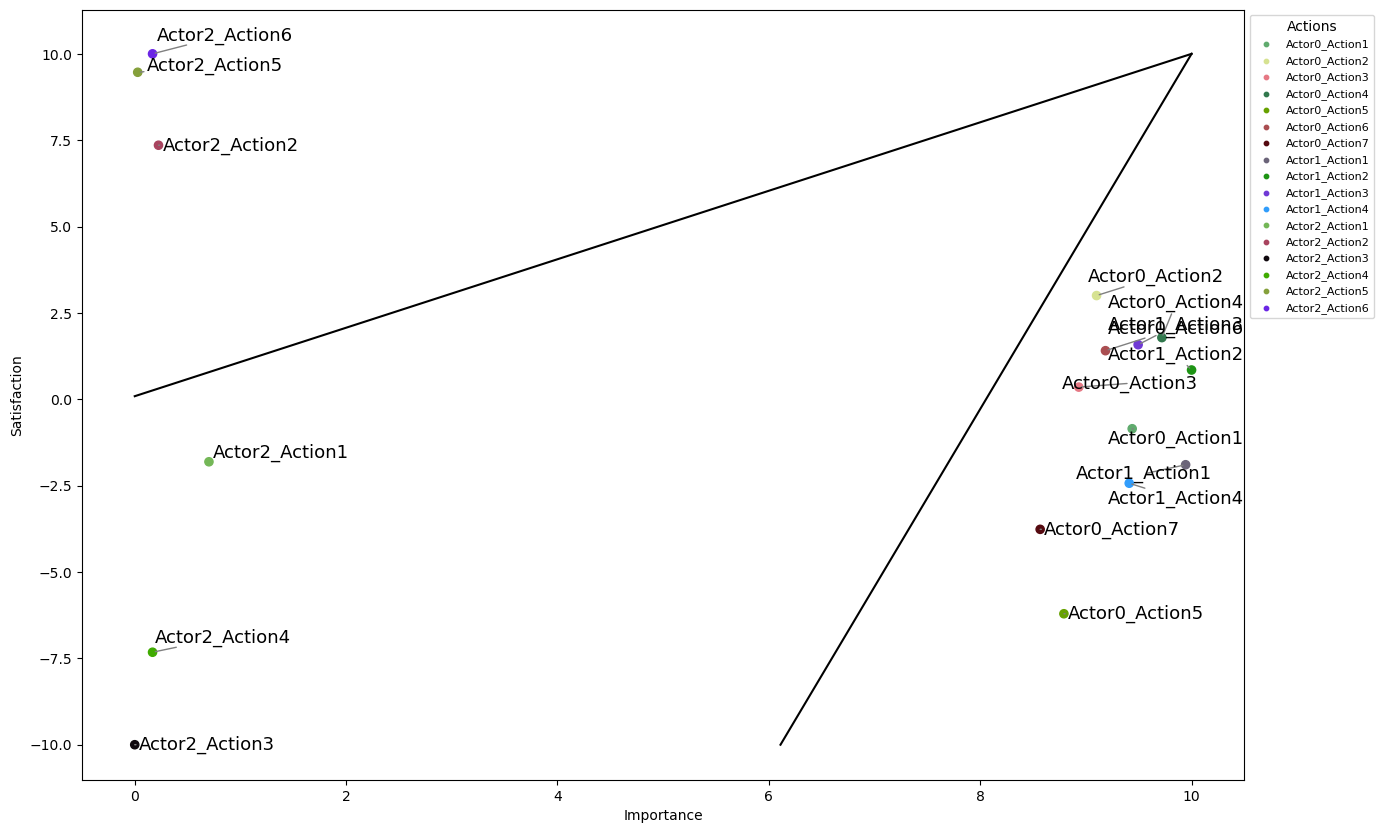

In [729]:
show_opportunity_area(importance,satisfaction,actions)